<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 30px; font-size: 27px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming For Data Science @ FIT-HCMUS, VNU-HCM
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Exploratory data analysis
</div>

### **1. Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **2. Read Data**

In [2]:
spmarket_sales_df = pd.read_csv("../data/processed/supermarket_sales_processed.csv",index_col="Invoice ID")
spmarket_sales_df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Datetime
Invoice ID,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019-03-08 10:29:00
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019-03-03 13:23:00
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00


### **3. Question 1: How do the quantities of purchases between men and women differ across different product lines each month?**

##### **Answering this question will:**
- Provide valuable insights into the market demand for different product lines among men and women. This information can help businesses identify popular products and adjust their inventory accordingly.
- Help companies create targeted marketing campaigns. By tailoring their messaging and advertising to specific gender demographics, businesses can increase the effectiveness of their marketing efforts.
- Help businesses to adjust their stock levels, reduce excess inventory, and avoid stockouts.

##### **How we answer this question:**
1. Convert the data type of the `Datetime` column from `object` to `datetime`.
2. Extract the `Month` value from the `Datetime` column.
3. Calculate the quantity of orders grouped by `Gender`, `Product line`, and `Month`.
4. Visualize the data with a corresponding chart for each month's data.


### **3.1 Pre-processing**

In [3]:
#Show info of columns
spmarket_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           1000 non-null   object 
 1   Customer type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Product line   1000 non-null   object 
 4   Unit price     1000 non-null   float64
 5   Quantity       1000 non-null   int64  
 6   Tax 5%         1000 non-null   float64
 7   Total          1000 non-null   float64
 8   Payment        1000 non-null   object 
 9   cogs           1000 non-null   float64
 10  gross income   1000 non-null   float64
 11  Rating         1000 non-null   float64
 12  Datetime       1000 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 109.4+ KB


In [4]:
#Convert 'Datetime' column to type datetime and create Month column.
spmarket_sales_df["Datetime"] = pd.to_datetime(spmarket_sales_df['Datetime'])
spmarket_sales_df["Month"] = spmarket_sales_df["Datetime"].dt.month
spmarket_sales_df.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Datetime,Month
Invoice ID,,,,,,,,,,,,,,
750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2019-01-05 13:08:00,1
226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,2019-03-08 10:29:00,3
631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2019-03-03 13:23:00,3
123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2019-01-27 20:33:00,1
373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,2019-02-08 10:37:00,2


### **3.2 Analyzing to get the answer**

- Calculate the quantity by group `["Gender", "Product line", "Month"]`

In [5]:
gender_Product_Month_count = spmarket_sales_df.groupby(["Gender", "Product line", "Month"]).size().reset_index(name="Count")
gender_Product_Month_count

,Gender,Product line,Month,Count
0,Female,Electronic accessories,1,23
1,Female,Electronic accessories,2,31
2,Female,Electronic accessories,3,30
3,Female,Fashion accessories,1,36
4,Female,Fashion accessories,2,32
5,Female,Fashion accessories,3,28
6,Female,Food and beverages,1,26
7,Female,Food and beverages,2,34
8,Female,Food and beverages,3,30
9,Female,Health and beauty,1,21


- Create a function that returns the quantity of orders for `Female` and `Male` for each product line

In [6]:
#Get Product Lines
product_Lines = list(gender_Product_Month_count["Product line"].unique())

#Function that returns the quantity of orders for `Female` and `Male` for each product line
def find_Quantity_of_Each_Gender(month):
    female = []
    male = []
    for product_Line in product_Lines:
        female_Male_Count_Each_Month = gender_Product_Month_count[(gender_Product_Month_count["Month"] == month) & 
                                                                (gender_Product_Month_count["Product line"] == product_Line)]
        female.append(female_Male_Count_Each_Month["Count"].values[0])
        male.append(female_Male_Count_Each_Month["Count"].values[1])

    return female, male

#Get values of `Female` and `Male` in each `Month`
female_Jan, male_Jan = find_Quantity_of_Each_Gender(1)
female_Feb, male_Feb = find_Quantity_of_Each_Gender(2)
female_Mar, male_Mar = find_Quantity_of_Each_Gender(3)


- Visualize the data using 3 bar charts, corresponding to each month.

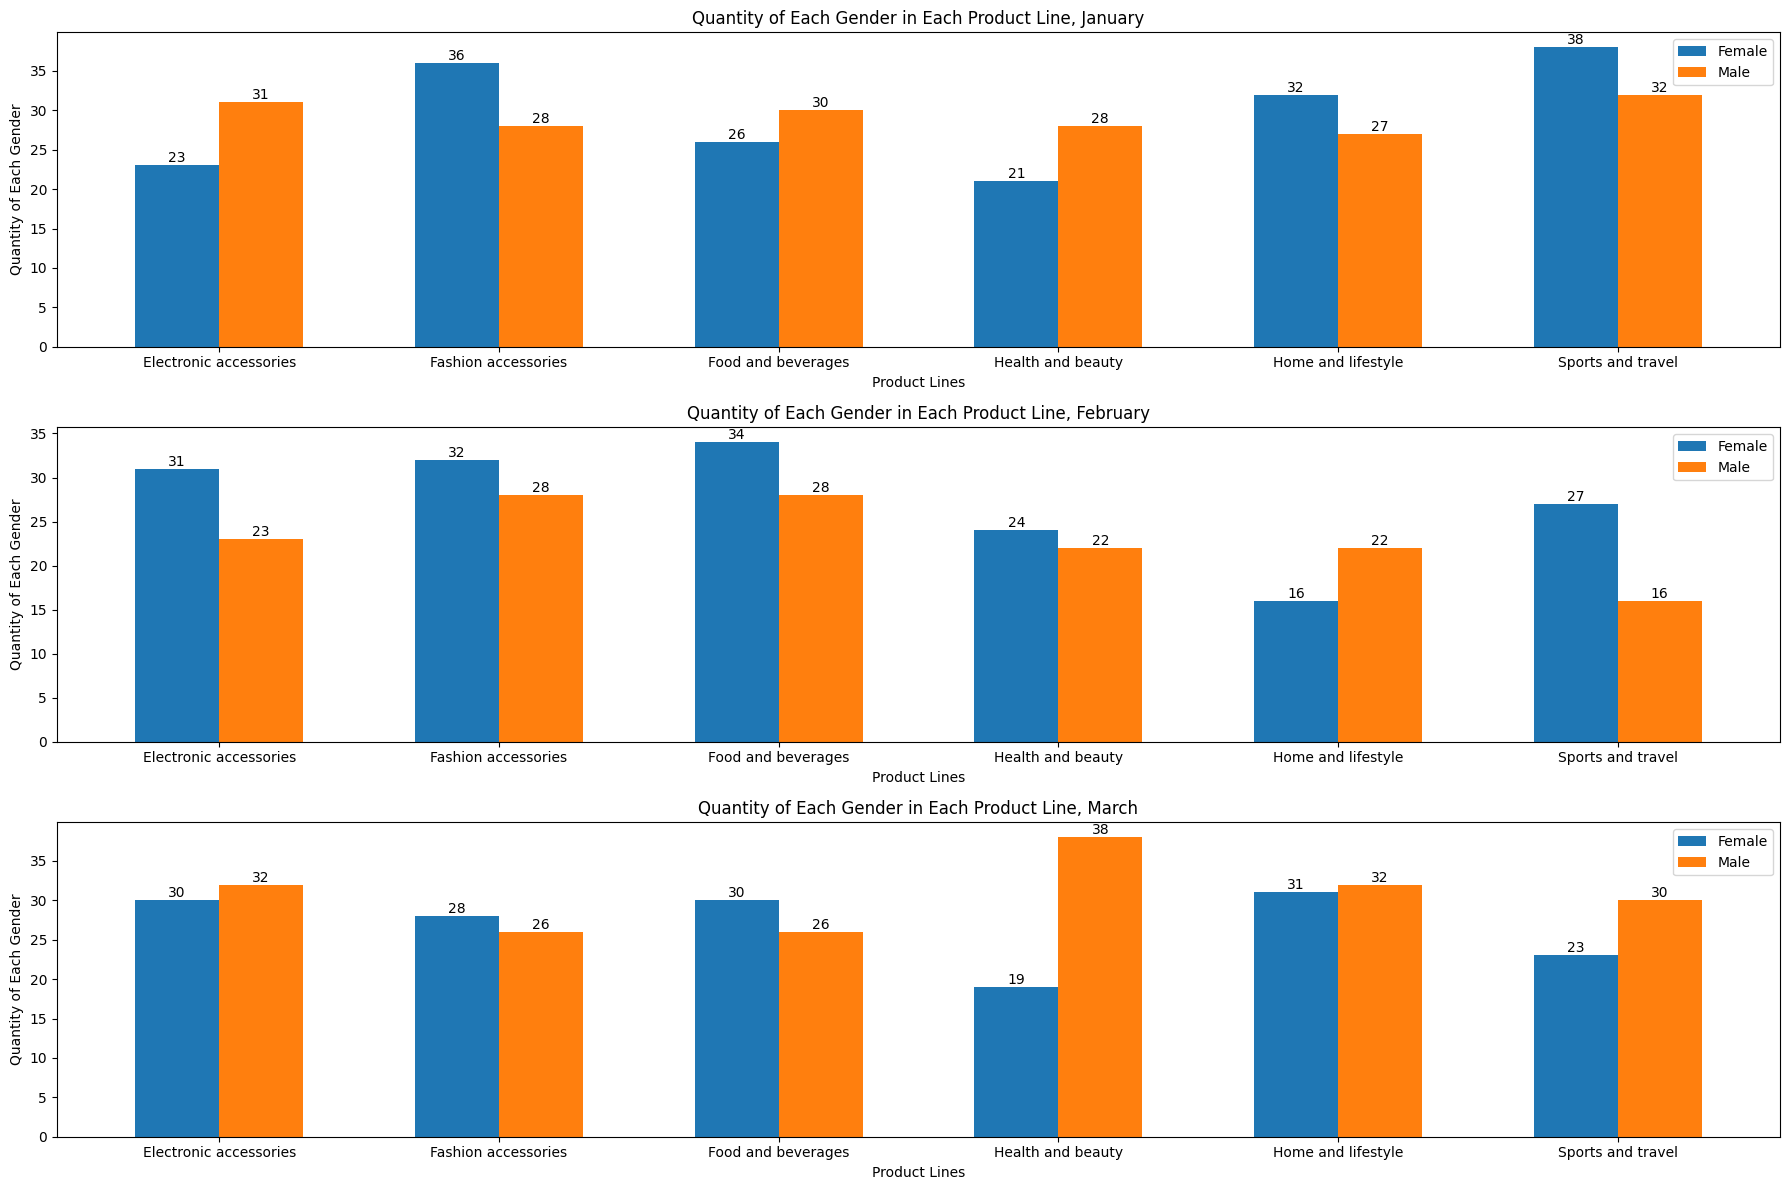

In [7]:
plt.figure(figsize=(18 , 12))

#Plot bar chart Function
def draw_bar(female, male, position, title):
    #Subplot
    ax = plt.subplot(3, 1, position)
    x_axis = np.arange(len(product_Lines)) 
    bar1 = ax.bar(x_axis - 0.15, female, 0.3, label = 'Female') 
    bar2 = ax.bar(x_axis + 0.15, male, 0.3, label = 'Male') 
    ax.bar_label(bar1)
    ax.bar_label(bar2)
    
    plt.xticks(x_axis, product_Lines) 
    plt.xlabel("Product Lines") 
    plt.ylabel("Quantity of Each Gender") 
    plt.title(title) 
    plt.legend() 

#Plot bar chart for each Month
draw_bar(female_Jan, male_Jan, 1, "Quantity of Each Gender in Each Product Line, January")
draw_bar(female_Feb, male_Feb, 2, "Quantity of Each Gender in Each Product Line, February")
draw_bar(female_Mar, male_Mar, 3, "Quantity of Each Gender in Each Product Line, March")

plt.tight_layout()
plt.show()


### **3.3. Comments and Conclusions**

- **Comment: In general, across each month, for each product line, we do not observe significant differences in the quantity of orders between Female and Male. However, in certain product lines during specific months, we can observe differences in purchasing power between Female and Male. Specifically:**

    - `In January`: `Fashion accessories`, `Home and lifestyle` and `Sports and travel` product line is purchased more by Female, while the `Electronic accessories`, `Food and beverages` and `Health and beauty` product line is purchased more by Male.

    - `In February`, the purchasing power of `Female` surpasses that of `Male` in most product lines. However, in the `Home and lifestyle` product line, the quantity of purchases by `Male` is higher than that of `Female`.

    - `In March`, most product lines are consumed equally by both `Female` and `Male`. However, notably, in the `Health and beauty` product line, `Male` purchases significantly outweigh those of `Female`. It seems that in this month, gentlemen show a great interest in health and beauty!

- **Conclusion: Based on the analysis above, the supermarket can consider adjusting the quantity of products for each item based on the consumption levels between Female and Male. This can help reduce inventory, lower costs associated with storage and warehousing**

### **4. Question 2: What are the payment method ratios for each product line among different customer types?**

##### **Answering this question will:**
- Provide insights into the preferred payment methods of different customer segments for each product line. This information can help businesses tailor their payment options to meet customer expectations and improve the overall customer experience.
- Optimize their payment infrastructure to accommodate the most commonly used payment methods.
- Knowing the payment method preferences of different customer types allows businesses to create targeted marketing campaigns and promotions.

##### **How we answer this question:**
1. Calculate the quantity by grouping `["Customer type", "Product line", "Payment"]`.
2. Separate the data by `Customer type`.
3. For each `Customer type`, each product line has a quantity of orders for different payment methods. Visualize the data according to `Customer type`.

### **4.1. Analyzing to get the answer**

- Calculate the quantity by group `["Customer type", "Product line", "Payment"]`

In [8]:
customer_Product_Payment = spmarket_sales_df.groupby(["Customer type", "Product line", "Payment"]).size().reset_index(name="Count")
customer_Product_Payment

,Customer type,Product line,Payment,Count
0,Member,Electronic accessories,Cash,31
1,Member,Electronic accessories,Credit card,22
2,Member,Electronic accessories,Ewallet,25
3,Member,Fashion accessories,Cash,23
4,Member,Fashion accessories,Credit card,30
5,Member,Fashion accessories,Ewallet,33
6,Member,Food and beverages,Cash,33
7,Member,Food and beverages,Credit card,32
8,Member,Food and beverages,Ewallet,29
9,Member,Health and beauty,Cash,24


- Write a function that returns the quantity of orders for each `Payment` method, for each `Product line`, and for each `Customer type`.

In [9]:
product_Lines = list(customer_Product_Payment["Product line"].unique())

#Func 
def find_Quantity_of_Each_Payment(Customer_type):
    customer_in_customer_Product_Payment = customer_Product_Payment[customer_Product_Payment["Customer type"] == Customer_type]
    quantity_of_Each_Payment = []
    for product_Line in product_Lines:
        quantity_of_Each_Payment_df = customer_in_customer_Product_Payment[customer_in_customer_Product_Payment["Product line"] == product_Line]
        quantity_of_Each_Payment.append(list(quantity_of_Each_Payment_df["Count"]))

    #Return a list containing lists that represent the quantity of each payment method for each product line
    return quantity_of_Each_Payment

#Get values for each `Customer type`
member_Customer	 = find_Quantity_of_Each_Payment("Member")
normal_Customer	 = find_Quantity_of_Each_Payment("Normal")

- "Visualize the data using pie charts for each product line of `Member Customer`."

Member Customer


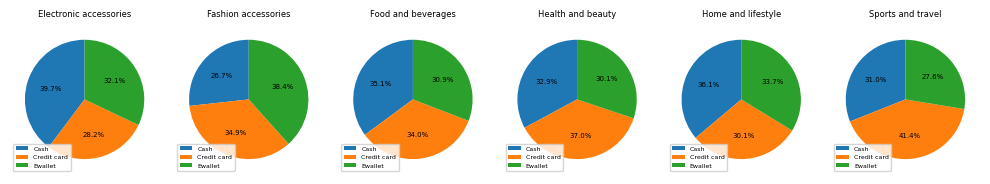

In [10]:
labels = ["Cash", "Credit card", "Ewallet"]
fig = plt.figure(figsize=(10, 10))

for index, value in enumerate(product_Lines):
    subplot = index + 1
    ax = plt.subplot(1, 6, subplot)
    wedges, texts, autotexts = ax.pie(member_Customer[index], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 5})
    ax.legend(wedges, labels, loc="lower left", bbox_to_anchor=(0, 0), fontsize=4.5)
    ax.set_title(value, fontdict={'fontsize': 6})

print("Member Customer")
plt.tight_layout()
plt.show()

- "Visualize the data using pie charts for each product line of `Normal Customer`."

Normal Customer


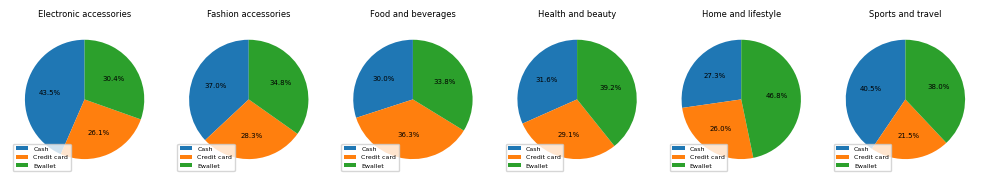

In [11]:
labels = ["Cash", "Credit card", "Ewallet"]
fig = plt.figure(figsize=(10, 15))

for index, value in enumerate(product_Lines):
    subplot = index + 1
    ax = plt.subplot(1, 6, subplot)
    wedges, texts, autotexts = ax.pie(normal_Customer[index], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 5})
    ax.legend(wedges, labels, loc="lower left", bbox_to_anchor=(0, 0), fontsize=4.5)
    ax.set_title(value, fontdict={'fontsize': 6})

print("Normal Customer")
plt.tight_layout()
plt.show()

### **4.2. Comments and Conclusions**

- **Comment: In general, for both the Member and Normal customer groups, across each product line, the payment methods have relatively balanced ratios. However, in certain product lines, there are differences in the ratios of payment methods. Specifically:**

    - In the `Member customer` group: For the `Sports and travel` product line, the `Credit card` payment method is used more frequently. `Cash` is the predominant payment method for the `Electronic accessories` product line. And `Ewallet` is the preferred choice for customers purchasing `Fashion accessories`.
    - In the `Normal customer` group: There are larger variations in the payment method ratios within each product line compared to the `Member` group, especially for `Electronic accessories`, `Home and lifestyle`, and `Sports and travel`. In this customer group, they prefer using `Cash` and `Ewallet` as payment methods.

- **Conclusion: Based on the analysis above, the supermarket can enhance special promotions when Member customers use Credit card as the payment method for purchasing Sports and travel products. Similarly, for the Normal customer group, promotions can be focused on the Cash and Ewallet payment methods for most product lines.**